In [179]:
# Import libraries
%matplotlib inline
from IPython.display import Image 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import sqlite3
from sqlite3 import Error
import warnings
warnings.filterwarnings('ignore')
plt.style.available[::]
sns.set_style("darkgrid")
# plt.rcParams["figure.figsize"] = [10,5]

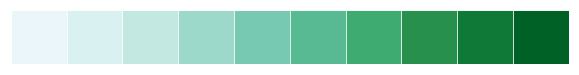

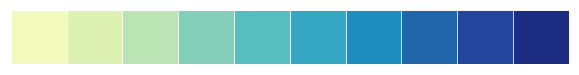

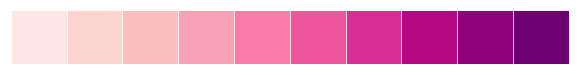

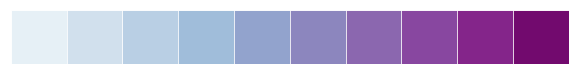

In [180]:
# Create color palettes for seaborn
sns.palplot(sns.color_palette("BuGn", 10))
sns.palplot(sns.color_palette("YlGnBu", 10))
RdPu = ['#fff7f3','#fde0dd','#fcc5c0','#fa9fb5','#f768a1','#dd3497','#ae017e','#7a0177','#49006a']
sns.palplot(sns.color_palette("RdPu", 10))
BuPu = ['#f7fcfd','#e0ecf4','#bfd3e6','#9ebcda','#8c96c6','#8c6bb1','#88419d','#810f7c','#4d004b']
sns.palplot(sns.color_palette("BuPu", 10))

# Create DataFrame, clean data and discretize target variable

In [181]:
# Import csv file with song data
data = '/Users/florencialeoni/code/omg_i_love_that_song/data/spotify_genres_popularity.csv'

In [182]:
# Create DataFrame
spotify_df = pd.DataFrame.from_csv(data)

In [183]:
# Check data types
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266371 entries, 0 to 266382
Data columns (total 21 columns):
playlist_id         266371 non-null object
playlist_name       266371 non-null object
track_uri           266371 non-null object
track_name          266371 non-null object
artist_name         266371 non-null object
album_name          266371 non-null object
duration_ms         266371 non-null float64
key                 266371 non-null float64
mode                266371 non-null float64
time_signature      266371 non-null float64
acousticness        266371 non-null float64
danceability        266371 non-null float64
energy              266371 non-null float64
instrumentalness    266371 non-null float64
liveness            266371 non-null float64
loudness            266371 non-null float64
speechiness         266371 non-null float64
valence             266371 non-null float64
tempo               266371 non-null float64
release_date        266371 non-null object
popularity      

In [184]:
# Check data
spotify_df.head(50)

playlist_id playlist_name               track_uri  \
0   ../data/spotify1.json-1    Throwbacks  0UaMYEvWZi0ZqiDOoHU3YI   
1   ../data/spotify1.json-1    Throwbacks  6I9VzXrHxO9rA9A5euc8Ak   
2   ../data/spotify1.json-1    Throwbacks  0WqIKmW4BTrj3eJFmnCKMv   
3   ../data/spotify1.json-1    Throwbacks  1AWQoqb9bSvzTjaLralEkT   
4   ../data/spotify1.json-1    Throwbacks  1lzr43nnXAijIGYnCT8M8H   
5   ../data/spotify1.json-1    Throwbacks  0XUfyU2QviPAs6bxSpXYG4   
6   ../data/spotify1.json-1    Throwbacks  68vgtRHr7iZHpzGpon6Jlo   
7   ../data/spotify1.json-1    Throwbacks  3BxWKCI06eQ5Od8TY2JBeA   
8   ../data/spotify1.json-1    Throwbacks  7H6ev70Weq6DdpZyyTmUXk   
9   ../data/spotify1.json-1    Throwbacks  2PpruBYCo4H7WOBJ7Q2EwM   
10  ../data/spotify1.json-1    Throwbacks  2gam98EZKrF9XuOkU13ApN   
11  ../data/spotify1.json-1    Throwbacks  4Y45aqo9QMa57rDsAJv40A   
12  ../data/spotify1.json-1    Throwbacks  1HwpWwa6bnqqRhK8agG4RS   
13  ../data/spotify1.json-1    Throwbacks  20ORwCJusz4KS2PbTPVNKo   
14  ../data/spotify1.json-1    Throwbacks  7k6IzwMGpxnRghE7YosnXT   
15  ../data/spotify1.json-1    Throwbacks  1Bv0Yl01xBDZD4OQP93fyl   
16  ../data/spotify1.json-1    Throwbacks  4omisSlTk6Dsq2iQD7MA07   
17  ../data/spotify1.json-1    Throwbacks  7xYnUQigPoIDAMPVK79NEq   
18  ../data/spotify1.json-1    Throwbacks  6d8A5sAx9TfdeseDvfWNHd   
19  ../data/spotify1.json-1    Throwbacks  4pmc2AxSEq6g7hPVlJCPyP   
20  ../data/spotify1.json-1    Throwbacks  215JYyyUnrJ98NK3KEwu6d   
21  ../data/spotify1.json-1    Throwbacks  0uqPG793dkDDN7sCUJJIVC   
22  ../data/spotify1.json-1    Throwbacks  19Js5ypV6JKn4DMExHQbGc   
23  ../data/spotify1.json-1    Throwbacks  1JURww012QnWAw0zZXi6Aa   
24  ../data/spotify1.json-1    Throwbacks  7DFnq8FYhHMCylykf6ZCxA   
25  ../data/spotify1.json-1    Throwbacks  1TfAhjzRBWzYZ8IdUV3igl   
26  ../data/spotify1.json-1    Throwbacks  1Y4ZdPOOgCUhBcKZOrUFiS   
27  ../data/spotify1.json-1    Throwbacks  6MjljecHzHelUDismyKkba   
28  ../data/spotify1.json-1    Throwbacks  67T6l4q3zVjC5nZZPXByU8   
29  ../data/spotify1.json-1    Throwbacks  34ceTg8ChN5HjrqiIYCn9Q   
30  ../data/spotify1.json-1    Throwbacks  5Q0Nhxo0l2bP3pNjpGJwV1   
31  ../data/spotify1.json-1    Throwbacks  6GIrIt2M39wEGwjCQjGChX   
32  ../data/spotify1.json-1    Throwbacks  4E5P1XyAFtrjpiIxkydly4   
33  ../data/spotify1.json-1    Throwbacks  3H1LCvO3fVsK2HPguhbml0   
34  ../data/spotify1.json-1    Throwbacks  3uoQULcUWfnt6nc6J7Vgai   
35  ../data/spotify1.json-1    Throwbacks  2nbClS09zsIAqNkshg6jnp   
36  ../data/spotify1.json-1    Throwbacks  69ghzc538EQSVon2Gm3wrr   
37  ../data/spotify1.json-1    Throwbacks  1kusepF3AacIEtUTYrw4GV   
38  ../data/spotify1.json-1    Throwbacks  7oK9VyNzrYvRFo7nQEYkWN   
39  ../data/spotify1.json-1    Throwbacks  12qZHAeOyTf93YAWvGDTat   
40  ../data/spotify1.json-1    Throwbacks  2jFlMILIQzs7lSFudG9lbo   
41  ../data/spotify1.json-1    Throwbacks  4I2GqMe7L2ccMpUbnDzYLH   
42  ../data/spotify1.json-1    Throwbacks  5lDriBxJd22IhOH9zTcFrV   
43  ../data/spotify1.json-1    Throwbacks  2eJ8ij1T3cNUKiGdcUvKhy   
44  ../data/spotify1.json-1    Throwbacks  5y69gQtK33qxb8a24ACkCy   
45  ../data/spotify1.json-1    Throwbacks  1X5WGCrUMuwRFuYU1eAo2I   
46  ../data/spotify1.json-1    Throwbacks  3utIAb67sOu0QHxBE88P1M   
47  ../data/spotify1.json-1    Throwbacks  3jkdQNkDTxxXtjSO4l0o1H   
48  ../data/spotify1.json-1    Throwbacks  5c1sfI6wIQEsSUw0xrkFdl   
49  ../data/spotify1.json-1    Throwbacks  6sqNctd7MlJoKDOxPVCAvU   

                                      track_name               artist_name  \
0     Lose Control (feat. Ciara & Fat Man Scoop)             Missy Elliott   
1                                          Toxic            Britney Spears   
2                                  Crazy In Love                   Beyoncé   
3                                 Rock Your Body         Justin Timberlake   
4                                   It Wasn't Me                    Shaggy   
5                           

In [185]:
# Drop track_uri column from dataframe
spotify_df.drop(["track_uri"], axis = 1, inplace = True)

In [186]:
# Lambda function to strip and split release date string values
f = lambda x: str(x).split("-")[0].strip()

In [187]:
# Apply Lambda function to release date column, in order to keep only the year of release
spotify_df["release_date"] = spotify_df["release_date"].map(f)

In [188]:
# Sanity check
spotify_df.head(100)

playlist_id     playlist_name  \
0   ../data/spotify1.json-1        Throwbacks   
1   ../data/spotify1.json-1        Throwbacks   
2   ../data/spotify1.json-1        Throwbacks   
3   ../data/spotify1.json-1        Throwbacks   
4   ../data/spotify1.json-1        Throwbacks   
5   ../data/spotify1.json-1        Throwbacks   
6   ../data/spotify1.json-1        Throwbacks   
7   ../data/spotify1.json-1        Throwbacks   
8   ../data/spotify1.json-1        Throwbacks   
9   ../data/spotify1.json-1        Throwbacks   
10  ../data/spotify1.json-1        Throwbacks   
11  ../data/spotify1.json-1        Throwbacks   
12  ../data/spotify1.json-1        Throwbacks   
13  ../data/spotify1.json-1        Throwbacks   
14  ../data/spotify1.json-1        Throwbacks   
15  ../data/spotify1.json-1        Throwbacks   
16  ../data/spotify1.json-1        Throwbacks   
17  ../data/spotify1.json-1        Throwbacks   
18  ../data/spotify1.json-1        Throwbacks   
19  ../data/spotify1.json-1        Throwbacks   
20  ../data/spotify1.json-1        Throwbacks   
21  ../data/spotify1.json-1        Throwbacks   
22  ../data/spotify1.json-1        Throwbacks   
23  ../data/spotify1.json-1        Throwbacks   
24  ../data/spotify1.json-1        Throwbacks   
25  ../data/spotify1.json-1        Throwbacks   
26  ../data/spotify1.json-1        Throwbacks   
27  ../data/spotify1.json-1        Throwbacks   
28  ../data/spotify1.json-1        Throwbacks   
29  ../data/spotify1.json-1        Throwbacks   
..                      ...               ...   
70  ../data/spotify1.json-2  Awesome Playlist   
71  ../data/spotify1.json-2  Awesome Playlist   
72  ../data/spotify1.json-2  Awesome Playlist   
73  ../data/spotify1.json-2  Awesome Playlist   
74  ../data/spotify1.json-2  Awesome Playlist   
75  ../data/spotify1.json-2  Awesome Playlist   
76  ../data/spotify1.json-2  Awesome Playlist   
77  ../data/spotify1.json-2  Awesome Playlist   
78  ../data/spotify1.json-2  Awesome Playlist   
79  ../data/spotify1.json-2  Awesome Playlist   
80  ../data/spotify1.json-2  Awesome Playlist   
81  ../data/spotify1.json-2  Awesome Playlist   
82  ../data/spotify1.json-2  Awesome Playlist   
83  ../data/spotify1.json-2  Awesome Playlist   
84  ../data/spotify1.json-2  Awesome Playlist   
85  ../data/spotify1.json-2  Awesome Playlist   
86  ../data/spotify1.json-2  Awesome Playlist   
87  ../data/spotify1.json-2  Awesome Playlist   
88  ../data/spotify1.json-2  Awesome Playlist   
89  ../data/spotify1.json-2  Awesome Playlist   
90  ../data/spotify1.json-2  Awesome Playlist   
91  ../data/spotify1.json-3           korean    
92  ../data/spotify1.json-3           korean    
93  ../data/spotify1.json-3           korean    
94  ../data/spotify1.json-3           korean    
95  ../data/spotify1.json-3           korean    
96  ../data/spotify1.json-3           korean    
97  ../data/spotify1.json-3           korean    
98  ../data/spotify1.json-3           korean    
99  ../data/spotify1.json-3           korean    

                                      track_name  \
0     Lose Control (feat. Ciara & Fat Man Scoop)   
1                                          Toxic   
2                                  Crazy In Love   
3                                 Rock Your Body   
4                                   It Wasn't Me   
5                                          Yeah!   
6                                         My Boo   
7                                        Buttons   
8                                    Say My Name   
9                 Hey Ya! - Radio Mix / Club Mix   
10                                   Promiscuous   
11  Right Where You Want Me - Radio Edit Version   
12                                Beautiful Soul   
13                                       Leavin'   
14                                        Me & U   
15                                       Ice Box   
16                                     Sk8er Boi   
17                                       

In [189]:
# Lambda function to strip and split release date string values to int
g = lambda x: int(x)
# Apply Lambda function to release date column
spotify_df["release_date"] = spotify_df["release_date"].map(g)

In [190]:
# Check data types
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266371 entries, 0 to 266382
Data columns (total 20 columns):
playlist_id         266371 non-null object
playlist_name       266371 non-null object
track_name          266371 non-null object
artist_name         266371 non-null object
album_name          266371 non-null object
duration_ms         266371 non-null float64
key                 266371 non-null float64
mode                266371 non-null float64
time_signature      266371 non-null float64
acousticness        266371 non-null float64
danceability        266371 non-null float64
energy              266371 non-null float64
instrumentalness    266371 non-null float64
liveness            266371 non-null float64
loudness            266371 non-null float64
speechiness         266371 non-null float64
valence             266371 non-null float64
tempo               266371 non-null float64
release_date        266371 non-null int64
popularity          266371 non-null float64
dtypes: float64(

In [192]:
# Create custom buckets
bins = [0. , 0.5 , 0.7, 1.0]

# Use pd.cut to segment danceability values into bins (discretizing a continuous variable)
pd.cut(spotify_df["danceability"], bins = bins, labels = ["No Dancing Here", "Dance around a bit", "Dance like nobody's watching"], 
       right = True, include_lowest = True).head()


0    Dance like nobody's watching
1    Dance like nobody's watching
2              Dance around a bit
3    Dance like nobody's watching
4    Dance like nobody's watching
Name: danceability, dtype: category
Categories (3, object): [No Dancing Here < Dance around a bit < Dance like nobody's watching]

In [193]:
# Assign binning to dancebility columns
spotify_df["danceability"] = pd.cut(spotify_df["danceability"], bins = bins, 
                                    labels = ["No Dancing Here", "Dance around a bit", "Dance like nobody's watching"], 
                               right = True, include_lowest = True)
spotify_df.head()

playlist_id playlist_name  \
0  ../data/spotify1.json-1    Throwbacks   
1  ../data/spotify1.json-1    Throwbacks   
2  ../data/spotify1.json-1    Throwbacks   
3  ../data/spotify1.json-1    Throwbacks   
4  ../data/spotify1.json-1    Throwbacks   

                                   track_name        artist_name  \
0  Lose Control (feat. Ciara & Fat Man Scoop)      Missy Elliott   
1                                       Toxic     Britney Spears   
2                               Crazy In Love            Beyoncé   
3                              Rock Your Body  Justin Timberlake   
4                                It Wasn't Me             Shaggy   

                                     album_name  duration_ms  key  mode  \
0                                  The Cookbook     226864.0  4.0   0.0   
1                                   In The Zone     198800.0  5.0   0.0   
2  Dangerously In Love (Alben für die Ewigkeit)     235933.0  2.0   0.0   
3                                     Justified     267267.0  4.0   0.0   
4                                      Hot Shot     227600.0  0.0   1.0   

   time_signature  acousticness                  danceability  energy  \
0             4.0       0.03110  Dance like nobody's watching   0.813   
1             4.0       0.02490  Dance like nobody's watching   0.838   
2             4.0       0.00238            Dance around a bit   0.758   
3             4.0       0.20200  Dance like nobody's watching   0.714   
4             4.0       0.05610  Dance like nobody's watching   0.606   

   instrumentalness  liveness  loudness  speechiness  valence    tempo  \
0          0.006970    0.0471    -7.105       0.1210    0.810  125.461   
1          0.025000    0.2420    -3.914       0.1140    0.924  143.040   
2          0.000000    0.0598    -6.583       0.2100    0.701   99.259   
3          0.000234    0.0521    -6.055       0.1400    0.818  100.972   
4          0.000000    0.3130    -4.596       0.0713    0.654   94.759   

   release_date  popularity  
0          2005        65.0  
1          2003        78.0  
2          2003        58.0  
3          2002        72.0  
4          2000        17.0

In [195]:
# Convert duration_ms from milliseconds to minutes
spotify_df["song_duration"] = round(spotify_df.duration_ms / 60000, 2)

# Drop duration ms column
spotify_df.drop(["duration_ms"], axis = 1, inplace = True)

In [196]:
# Create a DataFrame with only the numerical columns
df = spotify_df[["key", "mode", "time_signature", "acousticness", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence", "tempo", "release_date", "popularity", "song_duration", "danceability"]]

In [197]:
df.head()

key  mode  time_signature  acousticness  energy  instrumentalness  \
0  4.0   0.0             4.0       0.03110   0.813          0.006970   
1  5.0   0.0             4.0       0.02490   0.838          0.025000   
2  2.0   0.0             4.0       0.00238   0.758          0.000000   
3  4.0   0.0             4.0       0.20200   0.714          0.000234   
4  0.0   1.0             4.0       0.05610   0.606          0.000000   

   liveness  loudness  speechiness  valence    tempo  release_date  \
0    0.0471    -7.105       0.1210    0.810  125.461          2005   
1    0.2420    -3.914       0.1140    0.924  143.040          2003   
2    0.0598    -6.583       0.2100    0.701   99.259          2003   
3    0.0521    -6.055       0.1400    0.818  100.972          2002   
4    0.3130    -4.596       0.0713    0.654   94.759          2000   

   popularity  song_duration                  danceability  
0        65.0           3.78  Dance like nobody's watching  
1        78.0           3.31  Dance like nobody's watching  
2        58.0           3.93            Dance around a bit  
3        72.0           4.45  Dance like nobody's watching  
4        17.0           3.79  Dance like nobody's watching

In [198]:
# Create LabelEncoder object
l_e = LabelEncoder()
# Fit LabelEncoder and return encoded labels
df["danceability"] = l_e.fit_transform(df["danceability"])

In [199]:
# Check for null values
nan_rows = df[spotify_df.isnull().any(1)]

In [200]:
# Check for null values
print(nan_rows)

Empty DataFrame
Columns: [key, mode, time_signature, acousticness, energy, instrumentalness, liveness, loudness, speechiness, valence, tempo, release_date, popularity, song_duration, danceability]
Index: []


#### Celebrate a little because there are NO NULL VALUES! =)

In [201]:
# Check distribution of variables
df.describe()

key           mode  time_signature   acousticness  \
count  266371.000000  266371.000000   266371.000000  266371.000000   
mean        5.189364       0.663481        3.944078       0.230445   
std         3.611806       0.472520        0.333819       0.273616   
min         0.000000       0.000000        0.000000       0.000000   
25%         2.000000       0.000000        4.000000       0.020800   
50%         5.000000       1.000000        4.000000       0.105000   
75%         8.000000       1.000000        4.000000       0.358000   
max        11.000000       1.000000        5.000000       0.996000   

              energy  instrumentalness       liveness       loudness  \
count  266371.000000     266371.000000  266371.000000  266371.000000   
mean        0.647384          0.054482       0.189833      -7.209612   
std         0.208110          0.183982       0.155820       3.574175   
min         0.000000          0.000000       0.000000     -60.000000   
25%         0.514000          0.000000       0.094500      -8.627000   
50%         0.676000          0.000003       0.126000      -6.451000   
75%         0.810000          0.000725       0.242000      -4.884000   
max         1.000000          0.999000       1.000000       2.766000   

         speechiness        valence          tempo   release_date  \
count  266371.000000  266371.000000  266371.000000  266371.000000   
mean        0.093612       0.493828     121.718344    2007.878057   
std         0.100040       0.239411      28.770428      11.759681   
min         0.000000       0.000000       0.000000    1900.000000   
25%         0.035600       0.303000      99.693000    2006.000000   
50%         0.050400       0.488000     120.717000    2012.000000   
75%         0.102000       0.681000     140.000000    2015.000000   
max         0.965000       1.000000     232.690000    2018.000000   

          popularity  song_duration   danceability  
count  266371.000000  266371.000000  266371.000000  
mean       43.620972       3.903199       0.791802  
std        24.175236       1.225892       0.814074  
min         0.000000       0.050000       0.000000  
25%        24.000000       3.300000       0.000000  
50%        48.000000       3.750000       1.000000  
75%        64.000000       4.310000       1.000000  
max        87.000000      88.000000       2.000000

# Exploring Features and Target Variables through Visualizations

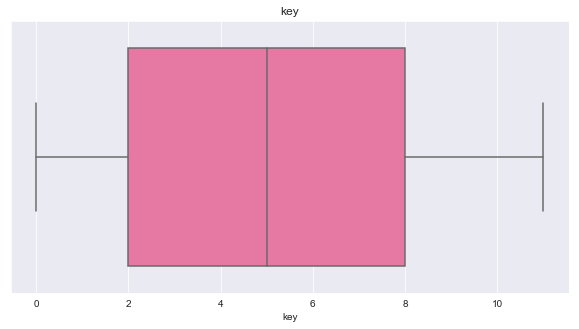

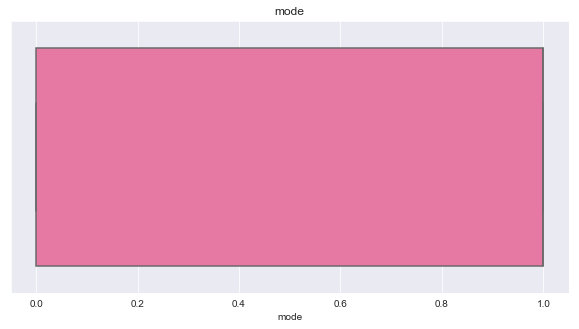

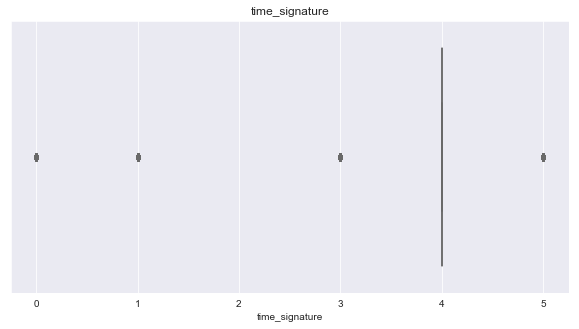

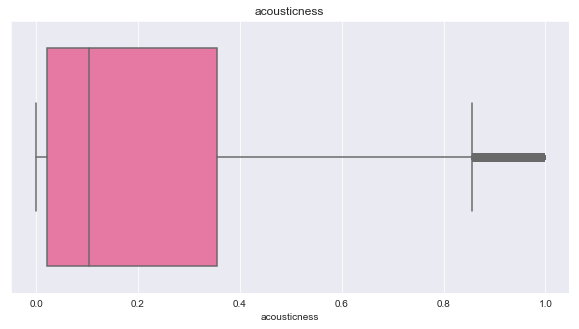

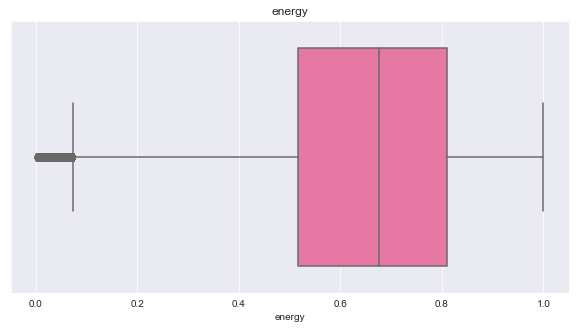

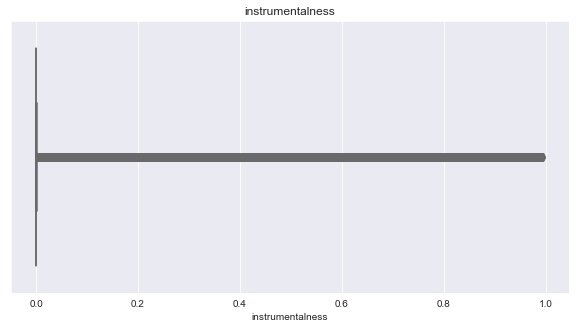

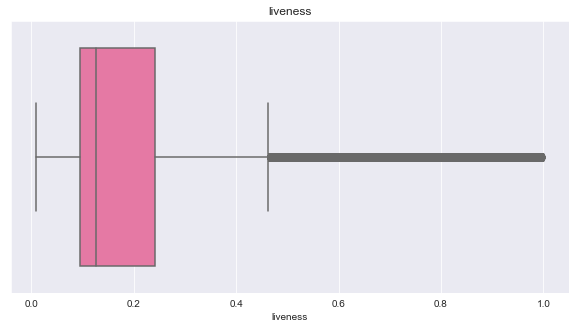

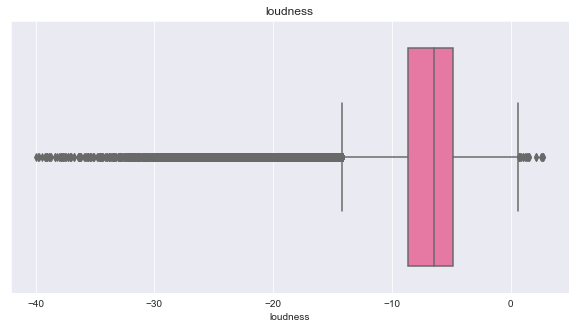

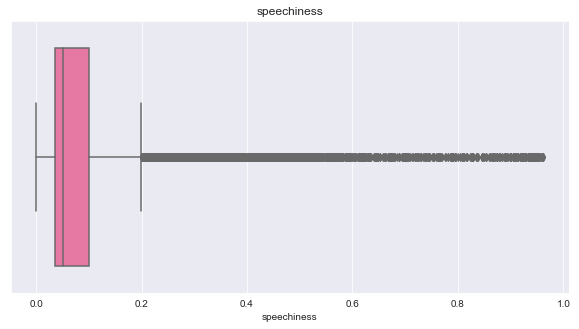

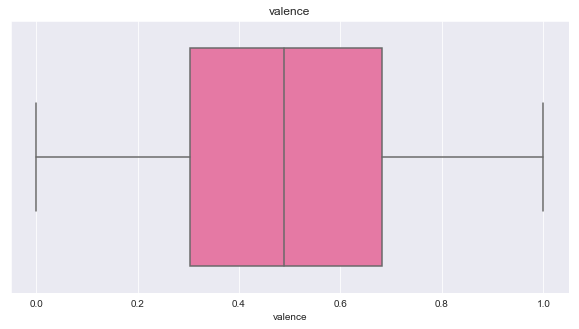

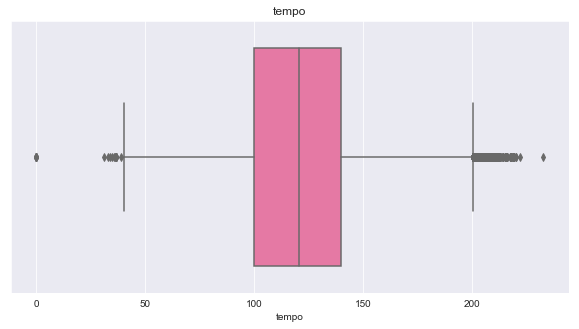

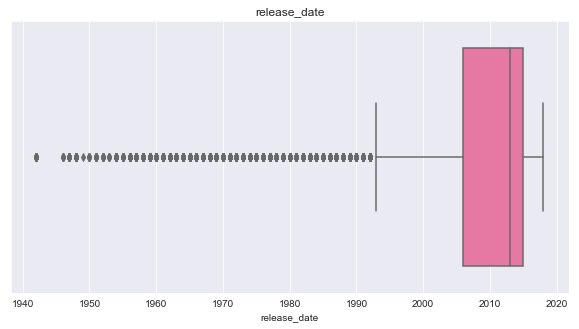

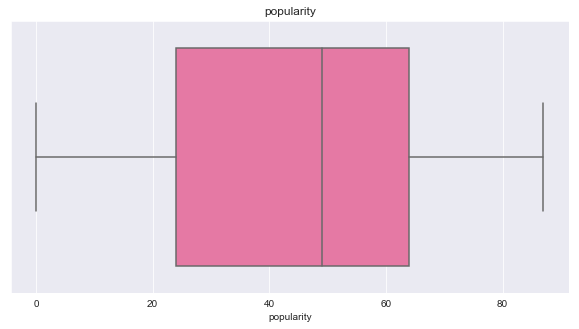

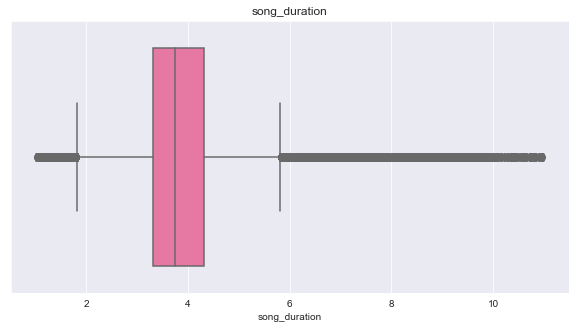

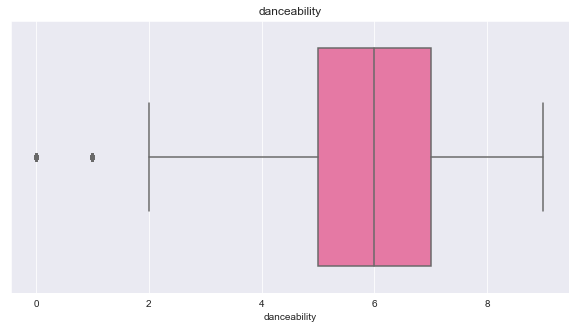

In [87]:
# Create boxplot for all numerical values to check distributions
for column in df.columns:
    sns.boxplot(x = column, palette = "RdPu", data = df).set_title(column)
    plt.show()

In [202]:
# Outlier Management
# Songs have to be at least one minute long
df = df[df.song_duration > 1.0]
# But also have to be less than 11 minutes
df = df[df.song_duration < 11.0]

In [203]:
# Outlier Management
# Only considering songs released after 1940
df = df[df.release_date > 1940]

In [204]:
# Outlier Management
# Only considering songs with loudnes of at least -40 decibels
df = df[df.loudness >+ (-40)]

In [205]:
# Sanity Check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265335 entries, 0 to 266382
Data columns (total 15 columns):
key                 265335 non-null float64
mode                265335 non-null float64
time_signature      265335 non-null float64
acousticness        265335 non-null float64
energy              265335 non-null float64
instrumentalness    265335 non-null float64
liveness            265335 non-null float64
loudness            265335 non-null float64
speechiness         265335 non-null float64
valence             265335 non-null float64
tempo               265335 non-null float64
release_date        265335 non-null int64
popularity          265335 non-null float64
song_duration       265335 non-null float64
danceability        265335 non-null int64
dtypes: float64(13), int64(2)
memory usage: 32.4 MB


In [206]:
# Save the DataFrame created to a csv file
df.to_csv(r'/Users/florencialeoni/code/omg_i_love_that_song/data/df_for_modeling.csv')

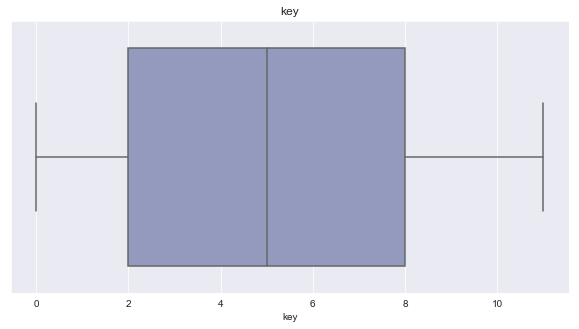

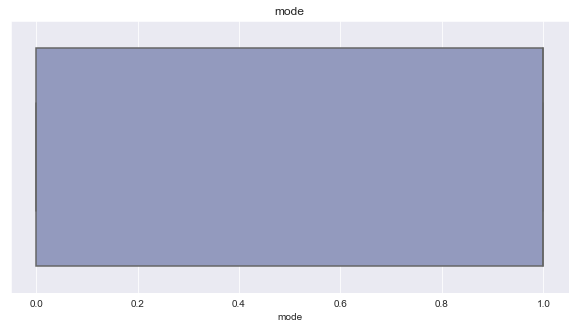

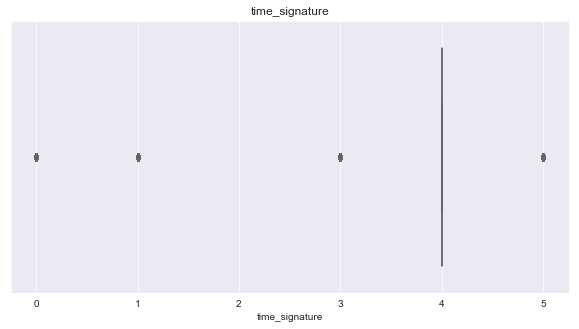

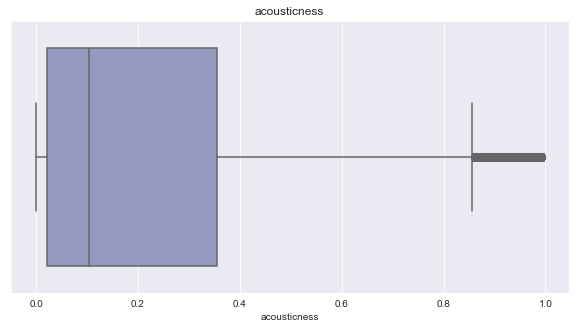

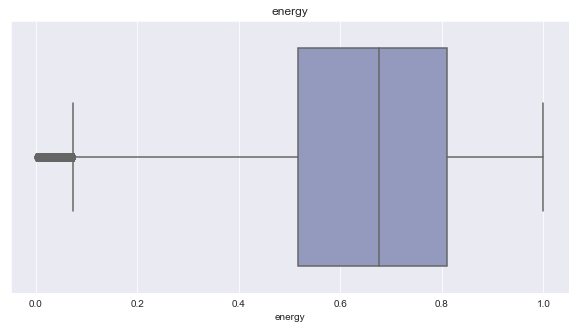

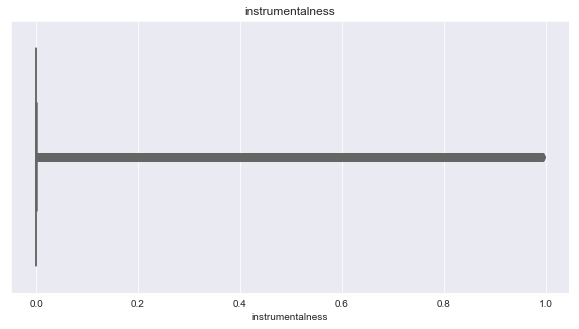

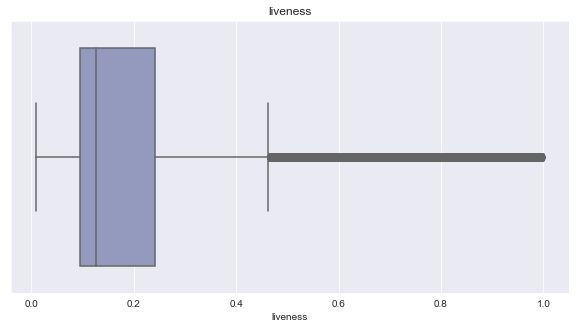

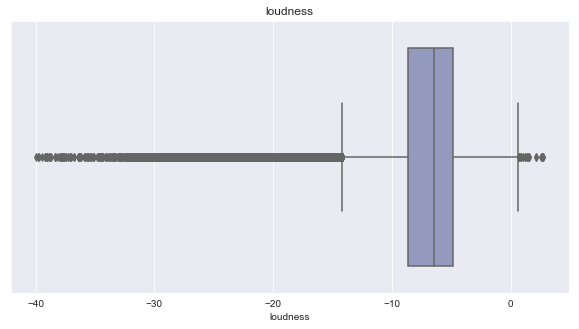

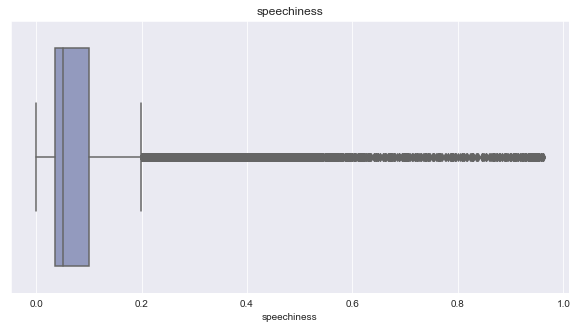

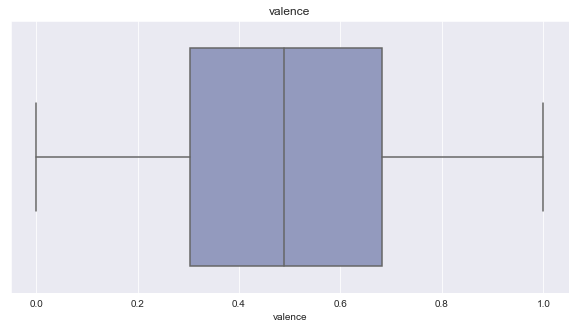

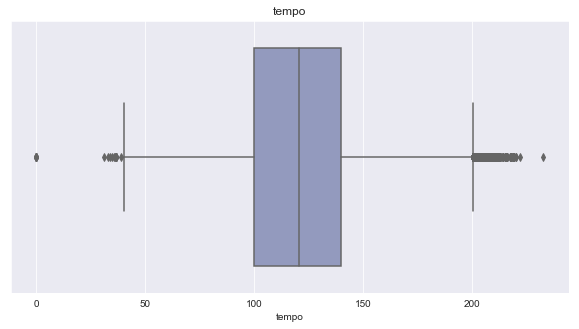

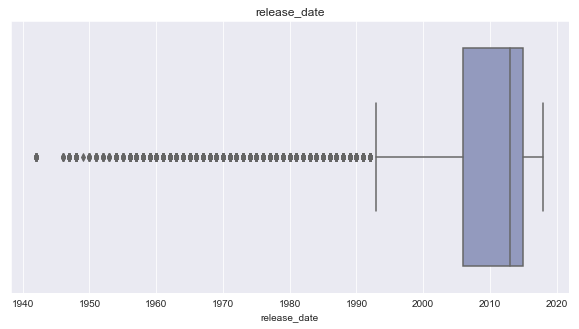

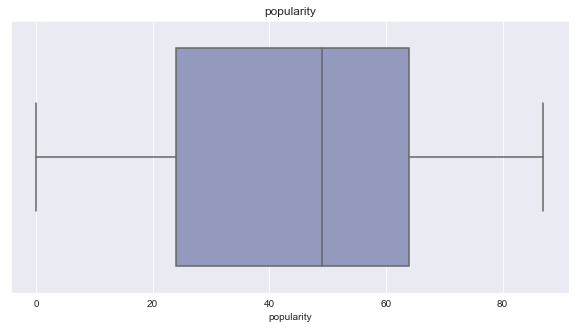

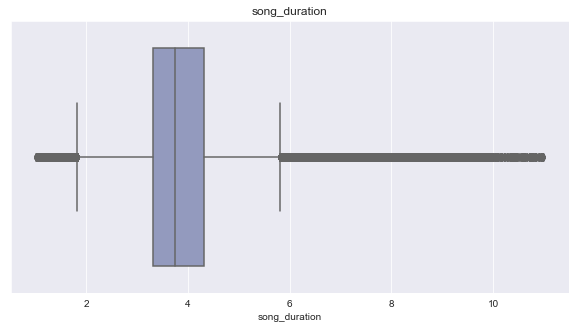

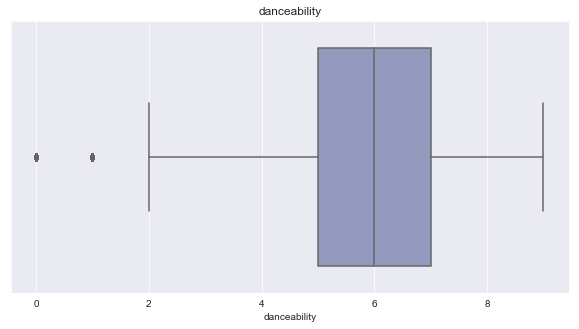

In [88]:
# Create boxplot for all numerical values to check new distributions
for column in df.columns:
    sns.boxplot(x = column, palette = "BuPu", data = df).set_title(column)
    plt.show()

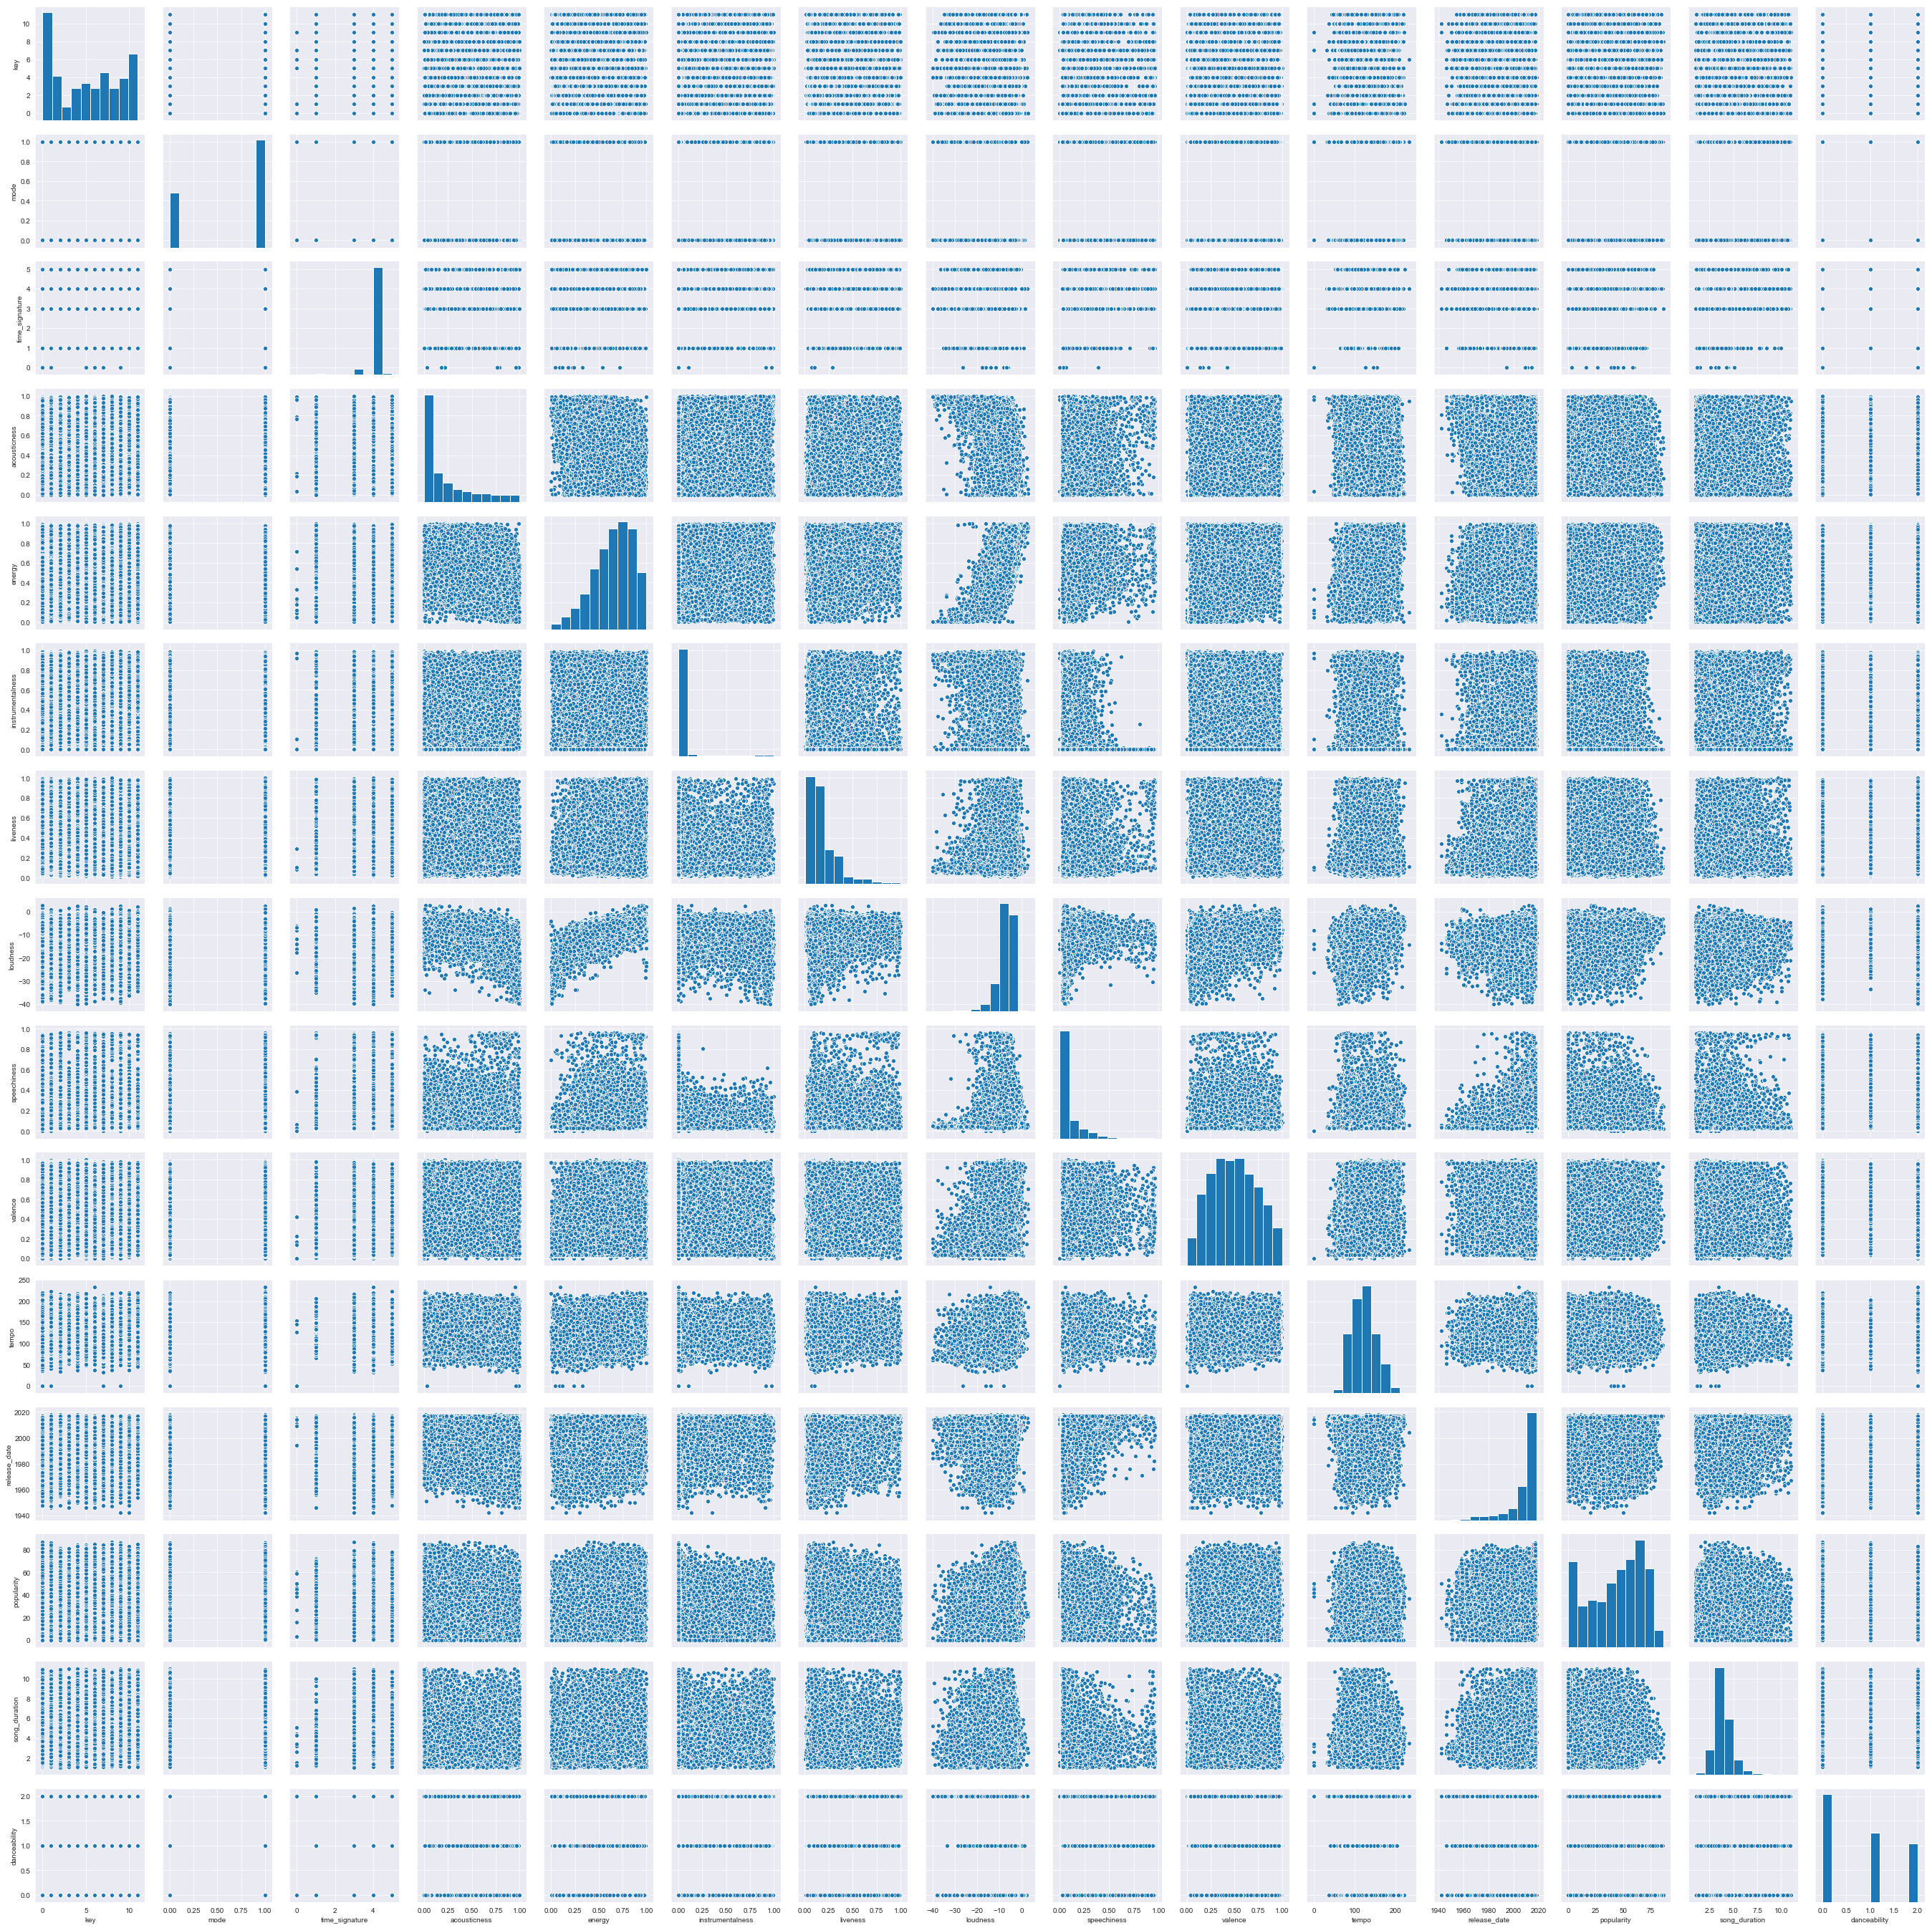

In [207]:
# Explore relationships between variables using a pairplot
sns.pairplot(df, palette = "RdPU")
plt.show()

In [208]:
# Correlation Matrix
df.corr()

key      mode  time_signature  acousticness    energy  \
key               1.000000 -0.140014        0.001748     -0.022387  0.035738   
mode             -0.140014  1.000000       -0.041539      0.081417 -0.053797   
time_signature    0.001748 -0.041539        1.000000     -0.166528  0.163022   
acousticness     -0.022387  0.081417       -0.166528      1.000000 -0.657187   
energy            0.035738 -0.053797        0.163022     -0.657187  1.000000   
instrumentalness -0.004148 -0.024800       -0.054617      0.149922 -0.130845   
liveness          0.002758 -0.003885        0.009687     -0.079404  0.171657   
loudness          0.017532 -0.046849        0.131736     -0.553530  0.752647   
speechiness       0.020876 -0.119894        0.050915     -0.079038  0.057739   
valence           0.032929  0.004669        0.092493     -0.172659  0.357221   
tempo             0.009479  0.013290       -0.015407     -0.125498  0.164135   
release_date     -0.000554 -0.082902        0.032919     -0.123501  0.086197   
popularity       -0.009029  0.004356        0.044115     -0.093566  0.029663   
song_duration     0.007001 -0.033671        0.007076     -0.049289 -0.021592   
danceability      0.002894  0.024028       -0.102658      0.096162 -0.121671   

                  instrumentalness  liveness  loudness  speechiness   valence  \
key                      -0.004148  0.002758  0.017532     0.020876  0.032929   
mode                     -0.024800 -0.003885 -0.046849    -0.119894  0.004669   
time_signature           -0.054617  0.009687  0.131736     0.050915  0.092493   
acousticness              0.149922 -0.079404 -0.553530    -0.079038 -0.172659   
energy                   -0.130845  0.171657  0.752647     0.057739  0.357221   
instrumentalness          1.000000 -0.030270 -0.309207    -0.107090 -0.163013   
liveness                 -0.030270  1.000000  0.093480     0.104267  0.014667   
loudness                 -0.309207  0.093480  1.000000     0.056328  0.221579   
speechiness              -0.107090  0.104267  0.056328     1.000000  0.035826   
valence                  -0.163013  0.014667  0.221579     0.035826  1.000000   
tempo                    -0.013887  0.028106  0.126162     0.065787  0.031351   
release_date             -0.017279 -0.000961  0.303615     0.141121 -0.222102   
popularity               -0.164609 -0.053323  0.099729     0.053694  0.060802   
song_duration             0.103310  0.033893 -0.061323    -0.023279 -0.187234   
danceability              0.093752  0.035387 -0.126107    -0.007988 -0.193156   

                     tempo  release_date  popularity  song_duration  \
key               0.009479     -0.000554   -0.009029       0.007001   
mode              0.013290     -0.082902    0.004356      -0.033671   
time_signature   -0.015407      0.032919    0.044115       0.007076   
acousticness     -0.125498     -0.123501   -0.093566      -0.049289   
energy            0.164135      0.086197    0.029663      -0.021592   
instrumentalness -0.013887     -0.017279   -0.164609       0.103310   
liveness          0.028106     -0.000961   -0.053323       0.033893   
loudness          0.126162      0.303615    0.099729      -0.061323   
speechiness       0.065787      0.141121    0.053694      -0.023279   
valence           0.031351     -0.222102    0.060802      -0.187234   
tempo             1.000000      0.024615    0.003727      -0.016181   
release_date      0.024615      1.000000   -0.029128      -0.069438   
popularity        0.003727     -0.029128    1.000000       0.002809   
song_duration    -0.016181     -0.069438    0.002809       1.000000   
danceability      0.094061     -0.058039   -0.041726       0.094138   

                  danceability  
key                   0.002894  
mode                  0.024028  
time_signature       -0.102658  
acousticness          0.096162  
energy               -0.121671  
instrumentalness      0.093752  
liveness              0.035387  
loudness             -0.126107  
speechiness

In [209]:
# Meaningful correlations, exploring collinearity
abs(df.corr()) > 0.80

key   mode  time_signature  acousticness  energy  \
key                True  False           False         False   False   
mode              False   True           False         False   False   
time_signature    False  False            True         False   False   
acousticness      False  False           False          True   False   
energy            False  False           False         False    True   
instrumentalness  False  False           False         False   False   
liveness          False  False           False         False   False   
loudness          False  False           False         False   False   
speechiness       False  False           False         False   False   
valence           False  False           False         False   False   
tempo             False  False           False         False   False   
release_date      False  False           False         False   False   
popularity        False  False           False         False   False   
song_duration     False  False           False         False   False   
danceability      False  False           False         False   False   

                  instrumentalness  liveness  loudness  speechiness  valence  \
key                          False     False     False        False    False   
mode                         False     False     False        False    False   
time_signature               False     False     False        False    False   
acousticness                 False     False     False        False    False   
energy                       False     False     False        False    False   
instrumentalness              True     False     False        False    False   
liveness                     False      True     False        False    False   
loudness                     False     False      True        False    False   
speechiness                  False     False     False         True    False   
valence                      False     False     False        False     True   
tempo                        False     False     False        False    False   
release_date                 False     False     False        False    False   
popularity                   False     False     False        False    False   
song_duration                False     False     False        False    False   
danceability                 False     False     False        False    False   

                  tempo  release_date  popularity  song_duration  danceability  
key               False         False       False          False         False  
mode              False         False       False          False         False  
time_signature    False         False       False          False         False  
acousticness      False         False       False          False         False  
energy            False         False       False          False         False  
instrumentalness  False         False       False          False         False  
liveness          False         False       False          False         False  
loudness          False         False       False          False         False  
speechiness       False         False       False          False         False  
valence           False         False       False          False         False  
tempo              True         False       False          False         False  
release_date      False          True       False          False         False  
popularity        False         False        True          False         False  
song_duration     False         False       False           True         False  
danceability      False         False       False          False          True

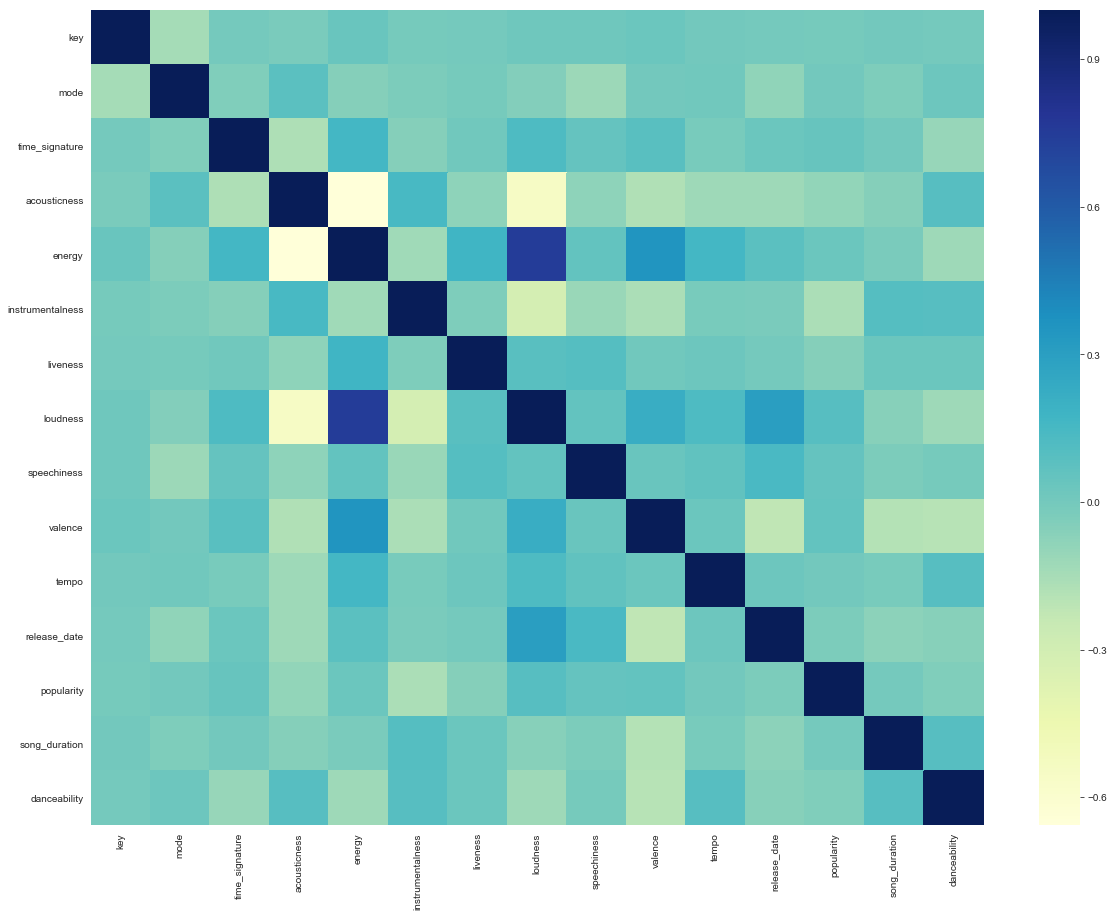

In [210]:
# Heatmap
plt.figure(figsize = (20, 15))
sns.heatmap(df.corr(), cmap = "YlGnBu")
plt.show()

Target Variable
danceability
0    121483
1     78138
2     65714
Name: danceability, dtype: int64


0 = Dance around a bit
1 = Dance like nobody's watching
2 = No Dancing


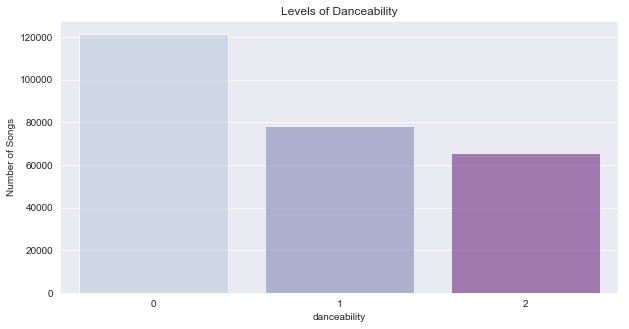

In [237]:
# Exploring Class Imbalance
print('Target Variable')
print(df.groupby(["danceability"]).danceability.count())
print("\n")
print("0 = Dance around a bit")
print("1 = Dance like nobody's watching")
print("2 = No Dancing")

# Target Variable Countplot
plt.figure(figsize = (10, 5))
sns.countplot(df["danceability"], alpha = .70, palette = "BuPu")
plt.title("Levels of Danceability")
plt.ylabel("Number of Songs")
plt.show()

In [212]:
colors = ["rebeccapurple", "hotpink", "cornflowerblue"]

Danceability by Mode


danceability      0      1      2
mode                             
0.0           39659  31222  18436
1.0           81824  46916  47278


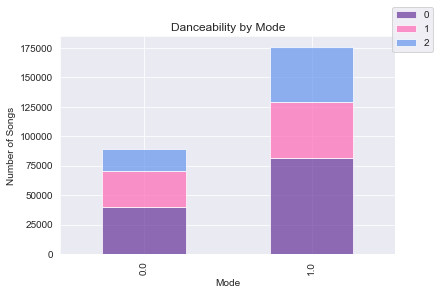

In [213]:
# Danceability by Mode
print("Danceability by Mode")

print('\n')
print(df.groupby(["mode","danceability"]).mode.count().unstack())

# Danceability by Mode Visualization
mode = df.groupby(["mode","danceability"]).mode.count().unstack()
p1 = mode.plot(kind = "bar", stacked = True, 
                   title = "Danceability by Mode", 
                   color = colors, alpha = .70)
p1.set_xlabel("Mode")
p1.set_ylabel("Number of Songs")
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

Danceability by Key


danceability      0      1     2
key                             
0.0           14912   8413  8468
1.0           12754  12878  5272
2.0           12227   6419  7272
3.0            3802   1428  2411
4.0            8363   4682  5547
5.0           10179   6540  4923
6.0            9219   5389  4161
7.0           13083   7772  7178
8.0            8464   6075  4271
9.0           11722   5903  7079
10.0           7185   5147  4351
11.0           9573   7492  4781


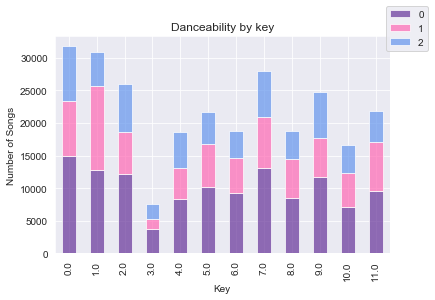

In [214]:
# Danceability by Key
print("Danceability by Key")

print('\n')
print(df.groupby(["key","danceability"]).key.count().unstack())

# Danceability by key Visualization
key = df.groupby(["key","danceability"]).key.count().unstack()
p1 = key.plot(kind = "bar", stacked = True, 
                   title = "Danceability by key", 
                   color = colors, alpha = .70)
p1.set_xlabel("Key")
p1.set_ylabel("Number of Songs")
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

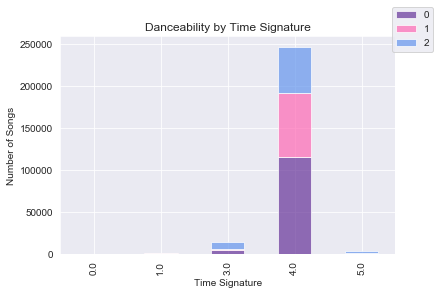

In [215]:
# Danceability by Time Signature Visualization
time_s = df.groupby(["time_signature","danceability"]).time_signature.count().unstack()
p1 = time_s.plot(kind = "bar", stacked = True, 
                   title = "Danceability by Time Signature", 
                   color = colors, alpha = .70)
p1.set_xlabel("Time Signature")
p1.set_ylabel("Number of Songs")
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

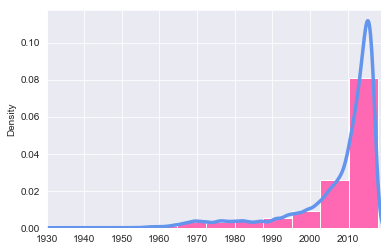

In [217]:
# Release Date histogram
df["release_date"].plot.hist(normed = True, color = colors[1])
df["release_date"].plot.kde(linewidth = 3.5, color = colors[2])
plt.xlim(1930, 2019)
plt.show()

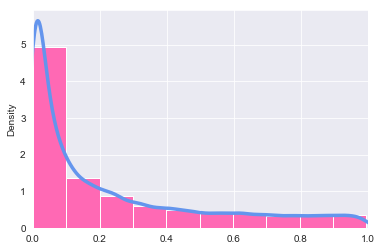

In [218]:
# Acousticness histogram
df["acousticness"].plot.hist(normed = True, color = colors[1])
df["acousticness"].plot.kde(linewidth = 3.5, color = colors[2])
plt.xlim(0, 1)
plt.show()

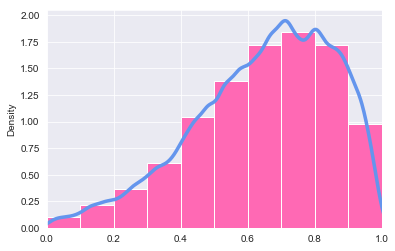

In [219]:
# Energy histogram
df["energy"].plot.hist(normed = True, color = colors[1])
df["energy"].plot.kde(linewidth = 3.5, color = colors[2])
plt.xlim(0, 1)
plt.show()

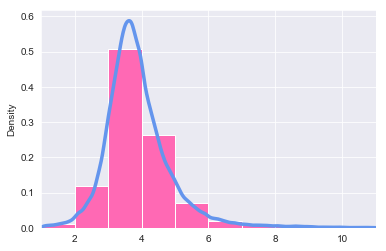

In [220]:
# Song Duration histogram
df["song_duration"].plot.hist(normed = True, color = colors[1])
df["song_duration"].plot.kde(linewidth = 3.5, color = colors[2])
plt.xlim(1, 11)
plt.show()

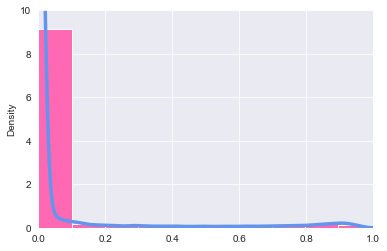

In [221]:
# Instrumentalness histogram
df["instrumentalness"].plot.hist(normed = True, color = colors[1])
df["instrumentalness"].plot.kde(linewidth = 3.5, color = colors[2])
plt.xlim(0, 1)
plt.ylim(0, 10)
plt.show()

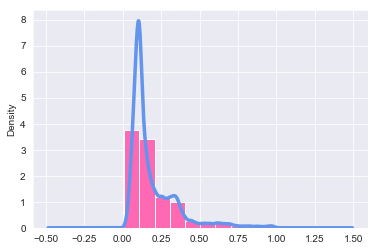

In [222]:
# Liveness histogram
df["liveness"].plot.hist(normed = True, color = colors[1])
df["liveness"].plot.kde(linewidth = 3.5, color = colors[2])
plt.show()

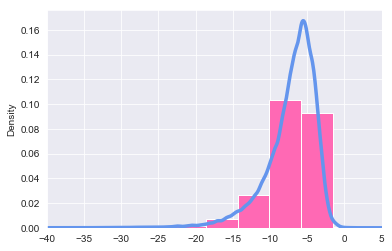

In [223]:
# Loudness histogram
df["loudness"].plot.hist(normed = True, color = colors[1])
df["loudness"].plot.kde(linewidth = 3.5, color = colors[2])
plt.xlim(-40, 5)
plt.show()

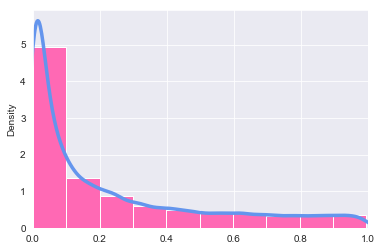

In [224]:
# Acousctiness histogram
df["acousticness"].plot.hist(normed = True, color = colors[1])
df["acousticness"].plot.kde(linewidth = 3.5, color = colors[2])
plt.xlim(0, 1)
plt.show()

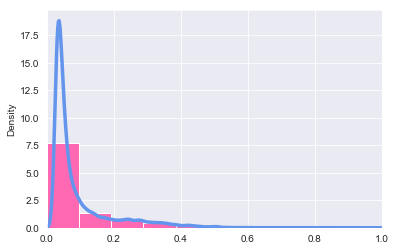

In [225]:
# Speechiness histogram
df["speechiness"].plot.hist(normed = True, color = colors[1])
df["speechiness"].plot.kde(linewidth = 3.5, color = colors[2])
plt.xlim(0, 1)
plt.show()

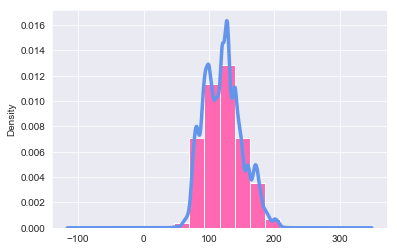

In [226]:
# Tempo histogram
df["tempo"].plot.hist(normed = True, color = colors[1])
df["tempo"].plot.kde(linewidth = 3.5, color = colors[2])
plt.show()

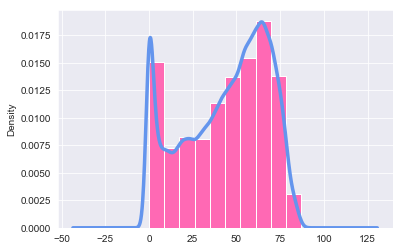

In [227]:
# Popularity histogram
df["popularity"].plot.hist(normed = True, color = colors[1])
df["popularity"].plot.kde(linewidth = 3.5, color = colors[2])
plt.show()

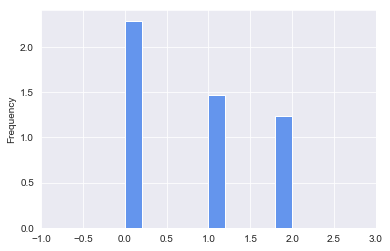

In [228]:
# Danceability histogram
df["danceability"].plot.hist(normed = True, color = colors[2])
plt.xlim(-1, 3)
plt.show()

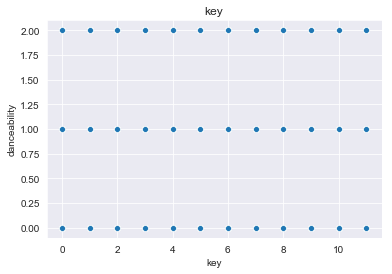

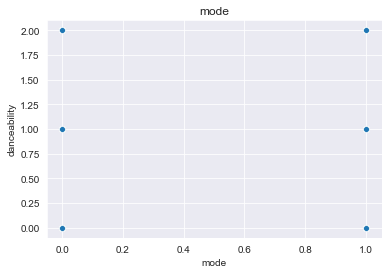

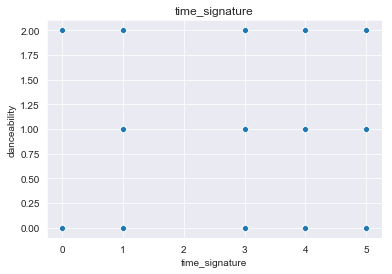

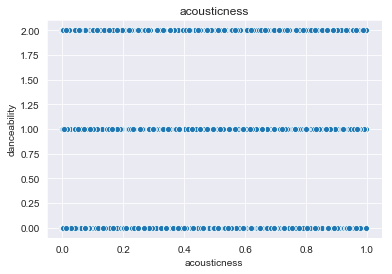

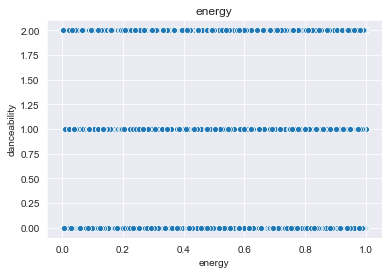

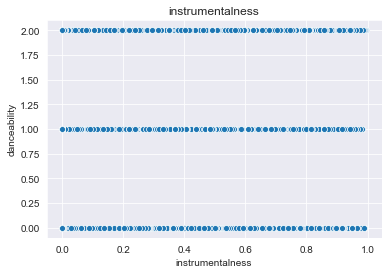

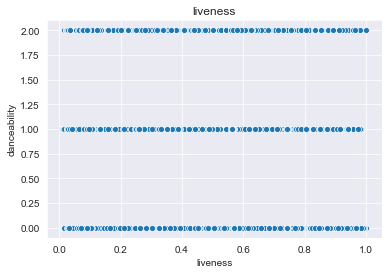

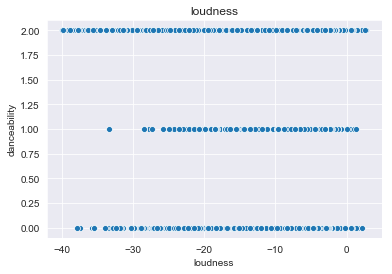

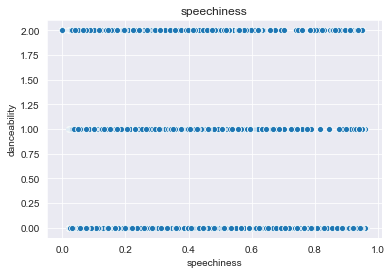

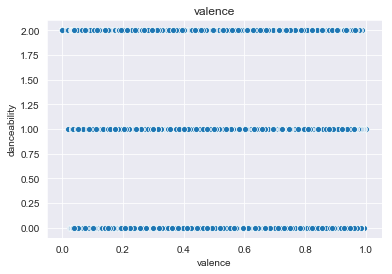

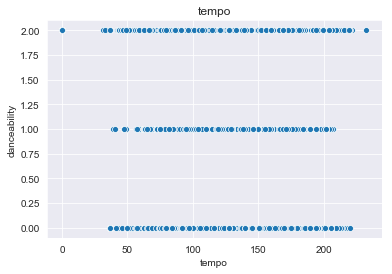

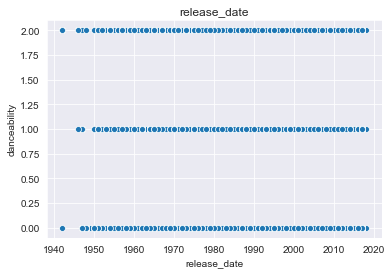

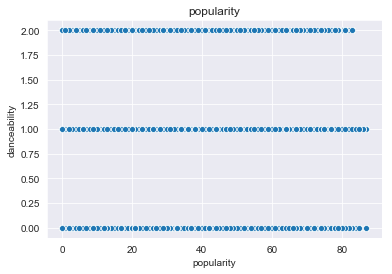

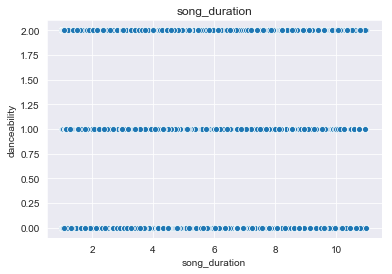

In [229]:
# Create scatterplots for target variable and features
dance = df["danceability"]
for column in df.columns:
    if column != "danceability":
        sns.scatterplot(x = column, y = dance, palette = "BuPu", data = df).set_title(column)
        plt.show()

# Create SQLite Database

In [232]:
# Function to create a new SQLite3 Database
def create_connection(db_file):
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)
    finally:
        conn.close()

In [233]:
# Use create_connection function to create Database
create_connection("/Users/florencialeoni/code/omg_i_love_that_song/data/spotify_project.db")

In [234]:
# Create a connection object using the connect function 
# To establish a connection with "spotify_models.db"
connection = sqlite3.connect("spotify_project.db")
# Create a cursor object by calling the cursor method
cursor = connection.cursor()

In [235]:
# Write records stored in the DataFrame to a SQL database
df.to_sql("spotify_numbers", con = connection)

In [236]:
# Write records stored in the Spotify DataFrame to a SQL database
spotify_df.to_sql("spotify_songs", con = connection)